# Day_01 - Data Analysis & EDA

### STEP 1 : Load & Display Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("D_Set/train.csv")

# Display the first few rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### STEP 2 : Data Cleaning

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

#### a) By dropping columns with too many missing values :

In [6]:
threshold = 0.5 * len(df)
df = df.dropna(thresh=threshold, axis=1)

#### b) By filling missing values:

In [7]:
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].median())

### STEP 3 : Handling Duplicate Values

In [8]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows
df = df.drop_duplicates()

Number of duplicate rows: 0


### STEP 4 : EDA

#### a) Univariate Analysis

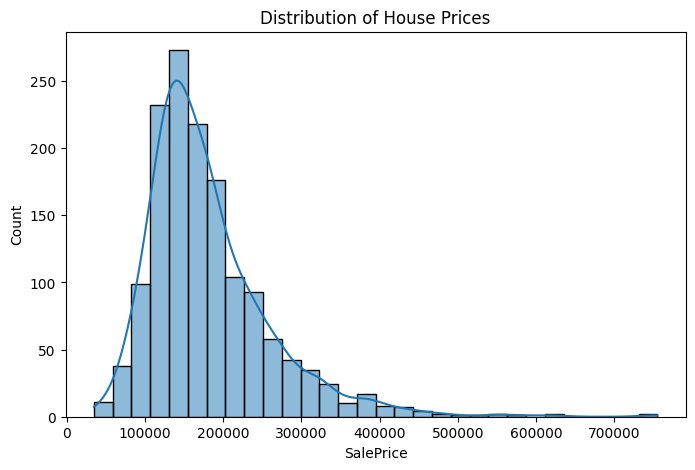

In [9]:
# Histogram for SalePrice
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.show()

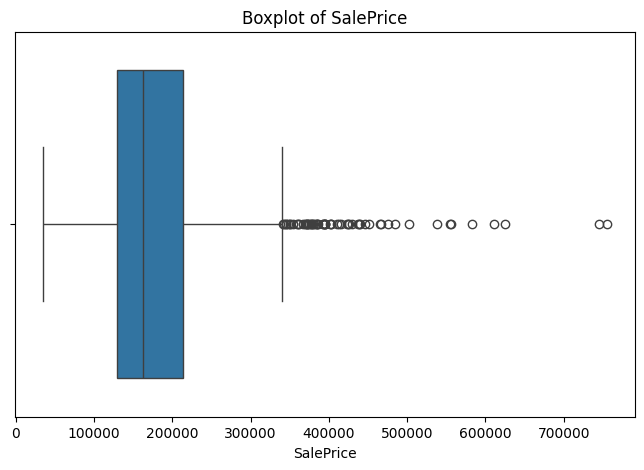

In [10]:
# Boxplot for SalePrice
plt.figure(figsize=(8,5))
sns.boxplot(x=df['SalePrice'])
plt.title("Boxplot of SalePrice")
plt.show()

#### b)Bivariate Analysis

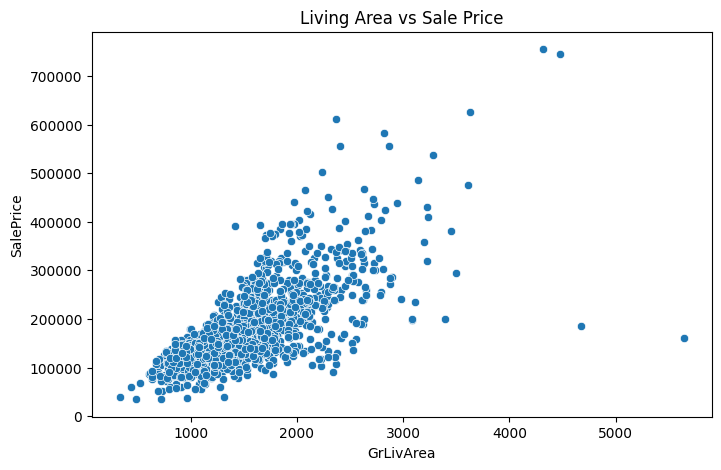

In [11]:
# Scatter plot of SalePrice vs GrLivArea
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["GrLivArea"], y=df["SalePrice"])
plt.title("Living Area vs Sale Price")
plt.show()

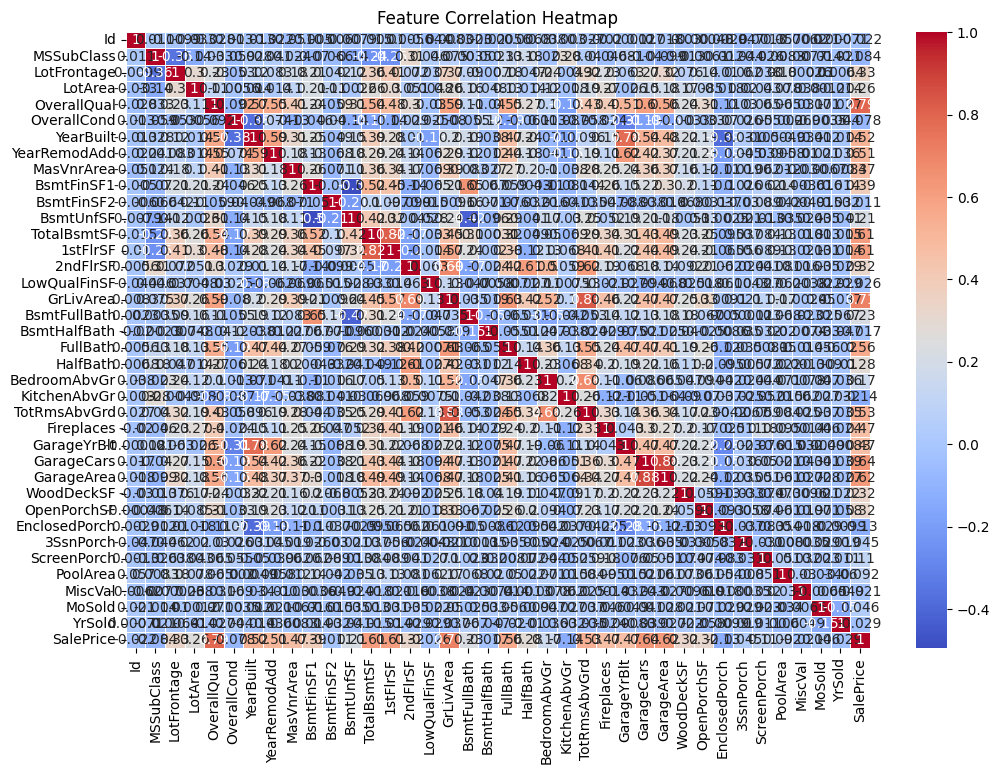

In [16]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#### c) Multivariate Analysis

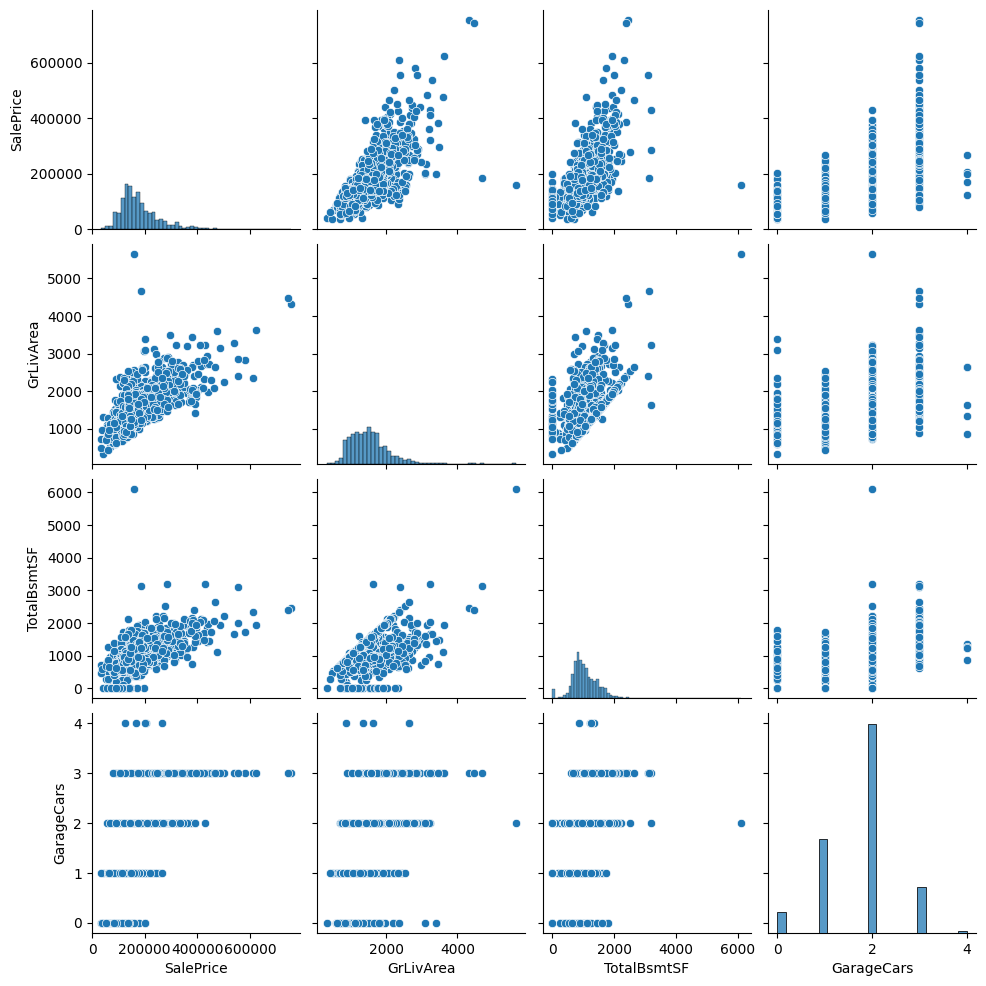

In [17]:
# Pairplot of selected features
selected_features = ["SalePrice", "GrLivArea", "TotalBsmtSF", "GarageCars"]
sns.pairplot(df[selected_features])
plt.show()